In [170]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from src.retriever import get_embeddings_for_target_text, search_and_filter_similar_vectors
from src.utils import connect_and_load_milvus_collection

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from src.retriever import *

from src.ssn import ( get_similarity_fraction_at_threshold, get_similarity_fraction_at_threshold_dict_for_all_texts_and_encoder_models, 
                     get_cross_text_consistency, get_from_encoder_to_cross_text_consistency )
from src.consistency_plots import ( plot_heatmap_for_similarity_fraction, plot_heatmap_for_similarity_fraction_plotly, 
                                   plot_heatmap_for_cross_text_consistency, plot_heatmap_for_cross_text_consistency_plotly)

from tqdm import tqdm

import numpy as np

import networkx as nx


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Exploring Cross-Text Consistency

In this section, we will explore the cross-text consistency based on the cosine similarity of vector embeddings for two embedding models. This analysis will help us understand how similar the texts are when represented in different embedding spaces.

In [110]:

texts = ["Bible_NT", "Quran", "Torah", "Gita", "Analects"]  # "Bible",
encoder_models = ["jina_clip_v1","all_MiniLM_L6_v2" ]
parameters = [0.5, 0.75]
parameter_path_dict = {"0.5" : "05_threshold" , "0.75" : "075_threshold"}
similarity_threshold = 0.75
parameter = parameter_path_dict[str(similarity_threshold)]

Get similarity fraction for all encoder models and all books in the knowledge base:

In [111]:
similarity_fraction_at_threshold_dict = get_similarity_fraction_at_threshold_dict_for_all_texts_and_encoder_models(encoder_models, similarity_threshold = 0.75, texts=["Torah", "Quran", "Bible_NT", "Gita", "Analects"])

  0%|          | 0/5 [00:00<?, ?it/s]

Torah Torah


100%|██████████| 5852/5852 [01:48<00:00, 54.09it/s]


Torah Quran


100%|██████████| 5852/5852 [01:42<00:00, 57.15it/s]


Torah Bible_NT


100%|██████████| 5852/5852 [01:46<00:00, 54.96it/s]


Torah Gita


100%|██████████| 5852/5852 [02:52<00:00, 33.90it/s]


Torah Analects


 20%|██        | 1/5 [10:35<42:21, 635.37s/it]

Quran Torah


100%|██████████| 6236/6236 [01:40<00:00, 61.99it/s]


Quran Quran


100%|██████████| 6236/6236 [02:05<00:00, 49.61it/s]


Quran Bible_NT


100%|██████████| 6236/6236 [02:00<00:00, 51.58it/s]


Quran Gita


100%|██████████| 6236/6236 [03:06<00:00, 33.49it/s]


Quran Analects


 40%|████      | 2/5 [22:03<33:18, 666.28s/it]

Bible_NT Torah


100%|██████████| 7957/7957 [02:14<00:00, 59.29it/s]


Bible_NT Quran


100%|██████████| 7957/7957 [02:25<00:00, 54.62it/s]


Bible_NT Bible_NT


100%|██████████| 7957/7957 [02:39<00:00, 50.02it/s]


Bible_NT Gita


100%|██████████| 7957/7957 [03:52<00:00, 34.25it/s]


Bible_NT Analects


 60%|██████    | 3/5 [36:21<25:07, 753.83s/it]

Gita Torah


100%|██████████| 625/625 [00:09<00:00, 66.94it/s]


Gita Quran


100%|██████████| 625/625 [00:10<00:00, 60.34it/s]


Gita Bible_NT


100%|██████████| 625/625 [00:09<00:00, 63.67it/s]


Gita Gita


100%|██████████| 625/625 [00:17<00:00, 34.73it/s]


Gita Analects


 80%|████████  | 4/5 [37:24<08:01, 481.20s/it]

Analects Torah


100%|██████████| 477/477 [00:06<00:00, 68.52it/s]


Analects Quran


100%|██████████| 477/477 [00:07<00:00, 66.47it/s]


Analects Bible_NT


100%|██████████| 477/477 [00:06<00:00, 70.93it/s]


Analects Gita


100%|██████████| 477/477 [00:13<00:00, 34.25it/s]


Analects Analects


  0%|          | 0/5 [00:00<?, ?it/s]

Torah Torah


100%|██████████| 5852/5852 [01:05<00:00, 88.87it/s]


Torah Quran


100%|██████████| 5852/5852 [00:59<00:00, 98.97it/s]


Torah Bible_NT


100%|██████████| 5852/5852 [01:05<00:00, 89.91it/s]


Torah Gita


100%|██████████| 5852/5852 [01:42<00:00, 57.26it/s]


Torah Analects


 20%|██        | 1/5 [06:15<25:00, 375.02s/it]

Quran Torah


100%|██████████| 6236/6236 [01:02<00:00, 100.35it/s]


Quran Quran


100%|██████████| 6236/6236 [01:12<00:00, 86.41it/s] 


Quran Bible_NT


100%|██████████| 6236/6236 [01:06<00:00, 94.33it/s]


Quran Gita


100%|██████████| 6236/6236 [01:47<00:00, 57.84it/s]


Quran Analects


 40%|████      | 2/5 [12:49<19:20, 386.68s/it]

Bible_NT Torah


100%|██████████| 7957/7957 [01:19<00:00, 100.68it/s]


Bible_NT Quran


100%|██████████| 7957/7957 [01:27<00:00, 91.00it/s] 


Bible_NT Bible_NT


100%|██████████| 7957/7957 [01:31<00:00, 86.63it/s]


Bible_NT Gita


100%|██████████| 7957/7957 [02:20<00:00, 56.60it/s]


Bible_NT Analects


 60%|██████    | 3/5 [21:27<14:52, 446.30s/it]

Gita Torah


100%|██████████| 625/625 [00:05<00:00, 104.50it/s]


Gita Quran


100%|██████████| 625/625 [00:06<00:00, 101.94it/s]


Gita Bible_NT


100%|██████████| 625/625 [00:06<00:00, 94.86it/s]


Gita Gita


100%|██████████| 625/625 [00:10<00:00, 60.08it/s]


Gita Analects


 80%|████████  | 4/5 [22:05<04:45, 285.27s/it]

Analects Torah


100%|██████████| 477/477 [00:04<00:00, 114.27it/s]


Analects Quran


100%|██████████| 477/477 [00:05<00:00, 84.25it/s]


Analects Bible_NT


100%|██████████| 477/477 [00:04<00:00, 96.50it/s] 


Analects Gita


100%|██████████| 477/477 [00:08<00:00, 55.99it/s]


Analects Analects


100%|██████████| 5/5 [22:36<00:00, 271.22s/it]


Plot results for similarity fraction:

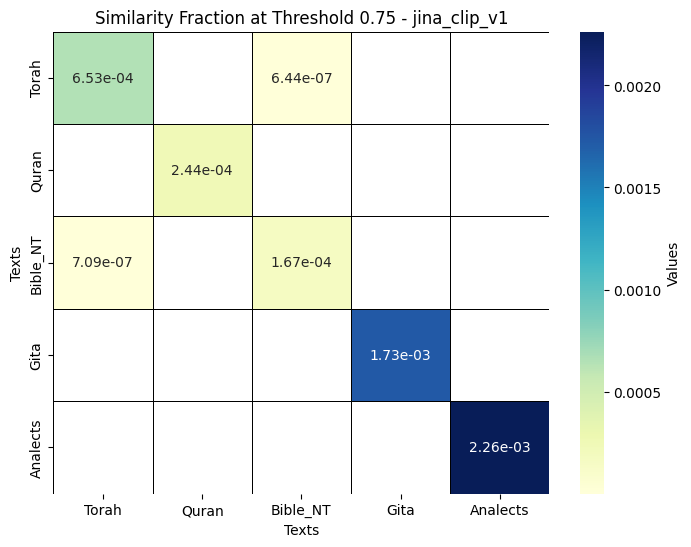

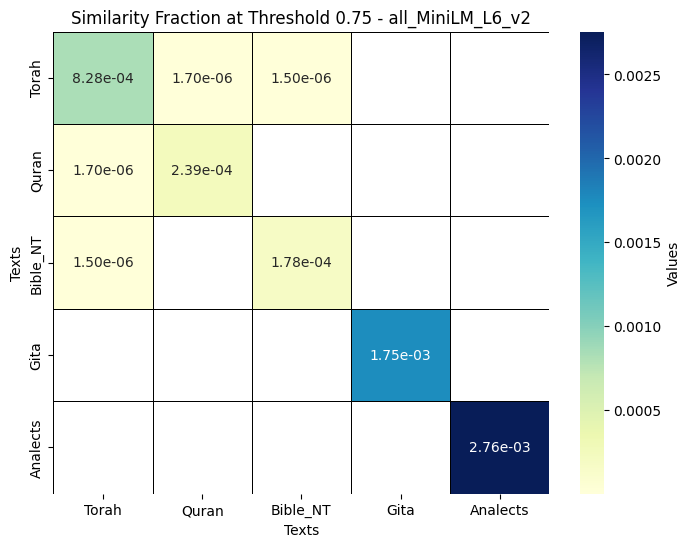

In [112]:
for encoder_model in encoder_models:

    plot_heatmap_for_similarity_fraction(similarity_fraction_at_threshold_dict[encoder_model], encoder_model)
    plot_heatmap_for_similarity_fraction_plotly(similarity_fraction_at_threshold_dict[encoder_model], encoder_model)

Get cross text semantic consistency for all encoder models and books in the knowledge base:

In [168]:
cross_text_consistency_formula_1, cross_text_consistency_formula_2 = get_from_encoder_to_cross_text_consistency(similarity_fraction_at_threshold_dict)


100%|██████████| 5/5 [00:00<00:00, 35971.73it/s]


Plot results for cross text semantic consistency:

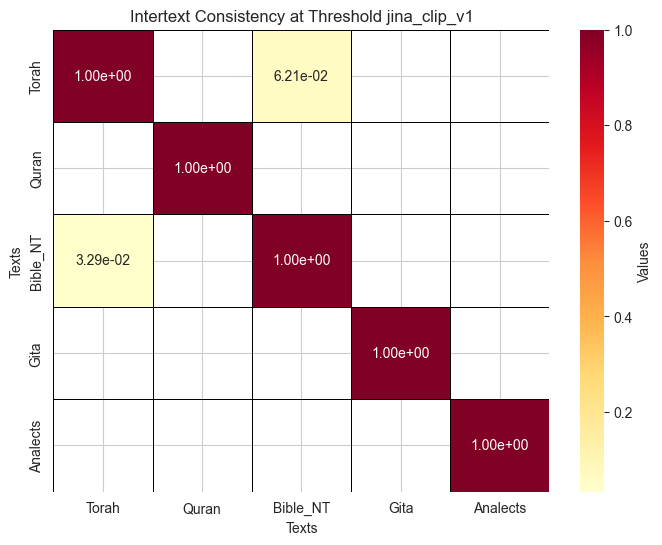

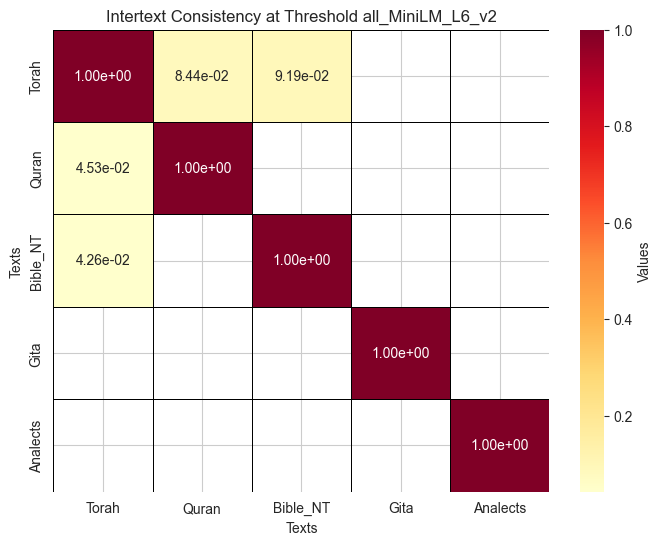

In [171]:
for encoder_model in encoder_models:

    plot_heatmap_for_cross_text_consistency(cross_text_consistency_formula_2[encoder_model], encoder_model)
    plot_heatmap_for_similarity_fraction_plotly(cross_text_consistency_formula_2[encoder_model], encoder_model)

In [114]:
similarity_fraction_at_threshold_dict

{'jina_clip_v1': {'Torah': {'Torah': 0.0006532168051396745,
   'Quran': 0.0,
   'Bible_NT': 7.086964615258141e-07,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 0.0,
   'Quran': 0.00024357318571920536,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 6.442695104780127e-07,
   'Quran': 0.0,
   'Bible_NT': 0.0001668197427074762,
   'Gita': 0.0,
   'Analects': 0.0},
  'Gita': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.001728,
   'Analects': 0.0},
  'Analects': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0022634477363325115}},
 'all_MiniLM_L6_v2': {'Torah': {'Torah': 0.0008280114316736974,
   'Quran': 1.6989526121560828e-06,
   'Bible_NT': 1.5032955244486964e-06,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 1.6989526121560828e-06,
   'Quran': 0.00023855874619056885,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 1.5032955244486964e-06,
  

In [115]:
cross_text_consistency_formula_2

{'jina_clip_v1': {'Torah': {'Torah': 0.0006532168051396745,
   'Quran': 0.0,
   'Bible_NT': 1.5941485094009858e-05,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 0.0,
   'Quran': 0.00024357318571920536,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 1.5941485094009858e-05,
   'Quran': 0.0,
   'Bible_NT': 0.0001668197427074762,
   'Gita': 0.0,
   'Analects': 0.0},
  'Gita': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.001728,
   'Analects': 0.0},
  'Analects': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0022634477363325115}},
 'all_MiniLM_L6_v2': {'Torah': {'Torah': 0.0008280114316736974,
   'Quran': 2.8819379650237103e-05,
   'Bible_NT': 2.582137853601666e-05,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 2.8819379650237103e-05,
   'Quran': 0.00023855874619056885,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 2.582137853601666e-05,
  

In [162]:
def plot_connected_graph(data, model_name):
    G = nx.DiGraph()  # Create a directed graph

    # Populate the graph with edges and their weights
    edges = []
    for source, targets_dict in data[model_name].items():
        for target, value in targets_dict.items():
            if value > 0:
                G.add_edge(source, target, weight=value*1000)
                edges.append((source, target, value))

    # Get edge values for color mapping
    edge_values = np.array([weight for _, _, weight in edges])
    norm = plt.Normalize(edge_values.min(), edge_values.max())  # Normalize for colormap
    colors = plt.cm.viridis(norm(edge_values))  # Use the viridis colormap

    # Position nodes using circular layout
    num_nodes = len(G.nodes())
    # Position nodes evenly on a circle
    angles = np.linspace(np.pi/2, 2* np.pi + np.pi/2, num_nodes, endpoint=False)  # Angles for nodes
    pos = {node: (np.cos(angle), np.sin(angle)) for node, angle in zip(G.nodes(), angles)}  # (x, y) positions


    # Draw the graph with colored edges
    plt.figure(figsize=(7, 5))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', arrows=True, edge_color=colors[:, :3])

    # Draw edge labels
    edge_labels = {(source, target): f'{value:.4f}' for source, target, value in edges}
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title('Intertext Similarity Graph - threshold 0.75 - '+ model_name)


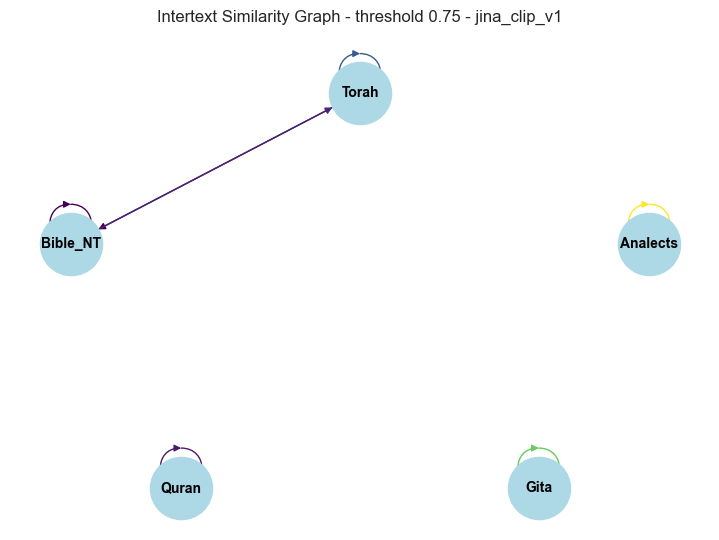

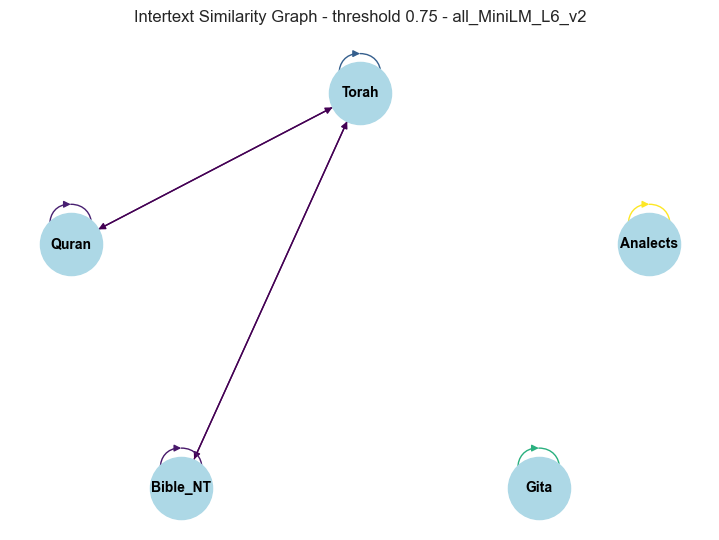

In [163]:
for encoder_model in encoder_models:
    plot_connected_graph(similarity_fraction_at_threshold_dict,encoder_model )

In [131]:
# Function to extract diagonals
def get_diagonals(data, model_name):
    main_diagonal = []
    secondary_diagonal = []
    
    keys = list(data[model_name].keys())
    n = len(keys)

    for i in range(n):
        # Main diagonal (i, i)
        main_diagonal.append(data[model_name][keys[i]][keys[i]])
        
        # Secondary diagonal (i, n-i-1)
        secondary_diagonal.append(data[model_name][keys[i]][keys[n-i-1]])
    
    return main_diagonal, secondary_diagonal

# Get diagonals for both models
main_diag_jina, sec_diag_jina = get_diagonals(similarity_fraction_at_threshold_dict, 'jina_clip_v1')
main_diag_all, sec_diag_all = get_diagonals(similarity_fraction_at_threshold_dict, 'all_MiniLM_L6_v2')

print("Main Diagonal for jina_clip_v1:", main_diag_jina)
print("Secondary Diagonal for jina_clip_v1:", sec_diag_jina)

print("Main Diagonal for all_MiniLM_L6_v2:", main_diag_all)
print("Secondary Diagonal for all_MiniLM_L6_v2:", sec_diag_all)

Main Diagonal for jina_clip_v1: [0.0006532168051396745, 0.00024357318571920536, 0.0001668197427074762, 0.001728, 0.0022634477363325115]
Secondary Diagonal for jina_clip_v1: [0.0, 0.0, 0.0001668197427074762, 0.0, 0.0]
Main Diagonal for all_MiniLM_L6_v2: [0.0008280114316736974, 0.00023855874619056885, 0.00017808110197186085, 0.0017536, 0.00275569268093298]
Secondary Diagonal for all_MiniLM_L6_v2: [0.0, 0.0, 0.00017808110197186085, 0.0, 0.0]


(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 ]),
 [Text(0, 0.0, '0.0000'),
  Text(0, 0.0005, '0.0005'),
  Text(0, 0.001, '0.0010'),
  Text(0, 0.0015, '0.0015'),
  Text(0, 0.002, '0.0020'),
  Text(0, 0.0025, '0.0025'),
  Text(0, 0.003, '0.0030')])

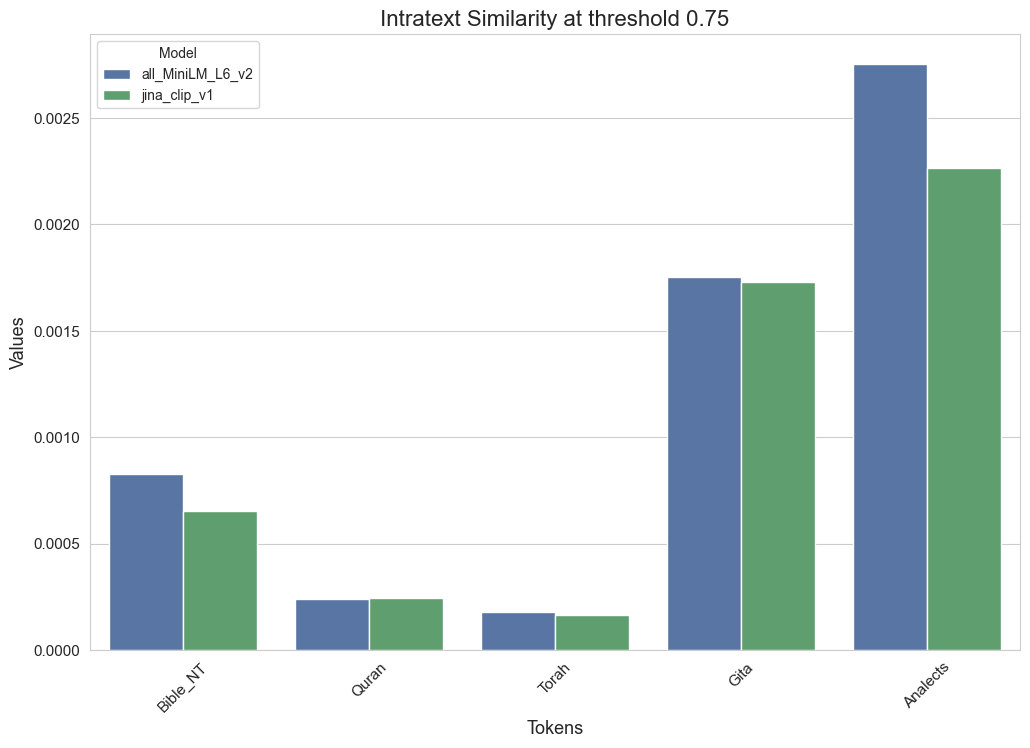

In [164]:
# Prepare data for DataFrame
models =  ['all_MiniLM_L6_v2'] * len(main_diag_all) + ['jina_clip_v1'] * len(main_diag_jina) 
books = ["Bible_NT", "Quran", "Torah", "Gita", "Analects"]  + ["Bible_NT", "Quran", "Torah", "Gita", "Analects"]
values =  main_diag_all + main_diag_jina 

# Create a DataFrame for better manipulation
df = pd.DataFrame({
    'Books': books,
    'Model': models,
    'Value': values
})

# Plotting
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create the bar plot
bars = sns.barplot(x='Books', y='Value', hue='Model', data=df, palette=[  "#4C72B0", "#55A868"])

# Customize the plot further
plt.title("Intratext Similarity at threshold 0.75", fontsize=16)
plt.xlabel("Tokens", fontsize=13)
plt.ylabel("Values", fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)


<Figure size 1200x800 with 0 Axes>

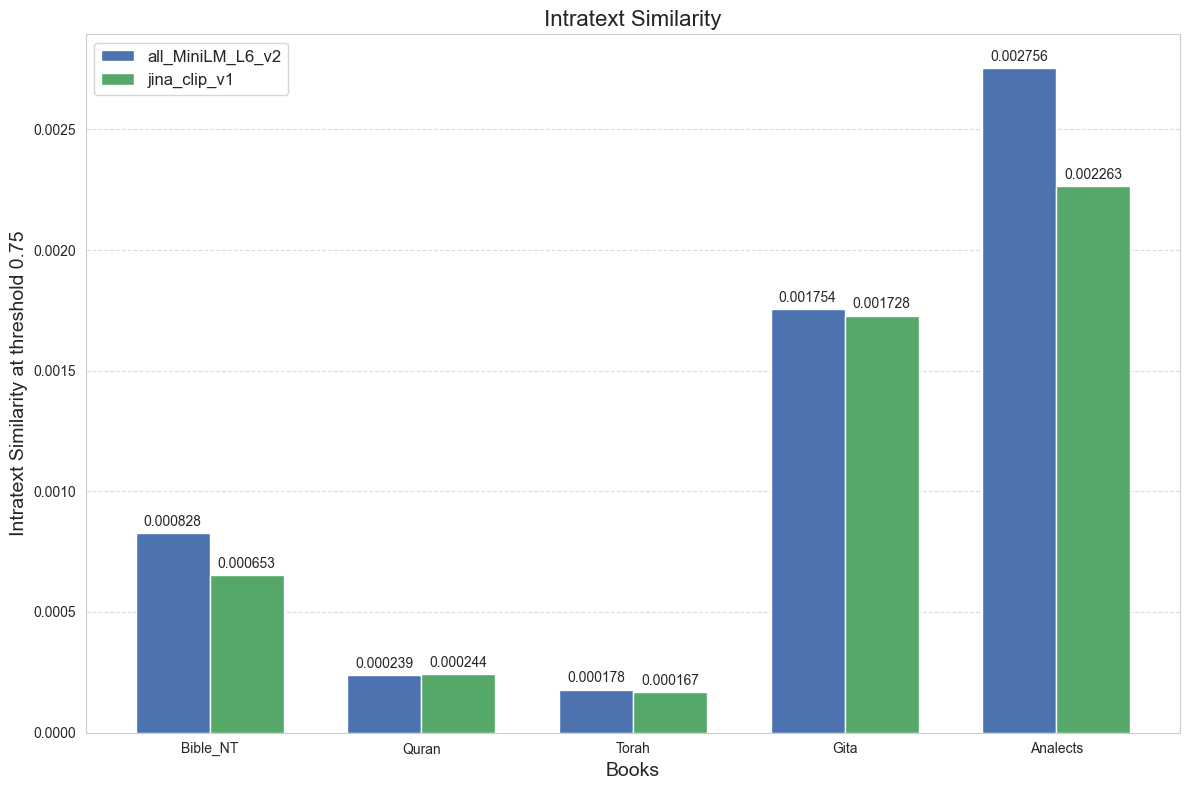

In [165]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Set up the bar plot
x = np.arange(len(books) // 2)  # Label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width / 2, main_diag_all, width, label="all_MiniLM_L6_v2", color="#4C72B0")
rects2 = ax.bar(x + width / 2, main_diag_jina, width, label="jina_clip_v1", color="#55A868")

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel("Books", fontsize=14)
ax.set_ylabel("Intratext Similarity at threshold 0.75", fontsize=14)
ax.set_title("Intratext Similarity", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(books[:len(books)//2])  # Show books only once in the x-ticks
ax.legend(fontsize=12)

# Add a grid for better readability
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.xaxis.grid(False)  # Turn off vertical grid lines

# Annotate bars with values
ax.bar_label(rects1, padding=3, fmt="%.6f", fontsize=10)
ax.bar_label(rects2, padding=3, fmt="%.6f", fontsize=10)

# Make the plot more compact
plt.tight_layout()
plt.show()

In [137]:
{'jina_clip_v1': {'Torah': {'Torah': 0.0006532168051396745,
   'Quran': 0.0,
   'Bible_NT': 7.086964615258141e-07,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 0.0,
   'Quran': 0.00024357318571920536,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 6.442695104780127e-07,
   'Quran': 0.0,
   'Bible_NT': 0.0001668197427074762,
   'Gita': 0.0,
   'Analects': 0.0},
  'Gita': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.001728,
   'Analects': 0.0},
  'Analects': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0022634477363325115}},
 'all_MiniLM_L6_v2': {'Torah': {'Torah': 0.0008280114316736974,
   'Quran': 1.6989526121560828e-06,
   'Bible_NT': 1.5032955244486964e-06,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 1.6989526121560828e-06,
   'Quran': 0.00023855874619056885,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 1.5032955244486964e-06,
   'Quran': 0.0,
   'Bible_NT': 0.00017808110197186085,
   'Gita': 0.0,
   'Analects': 0.0},
  'Gita': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.0017536,
   'Analects': 0.0},
  'Analects': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.00275569268093298}}}

{'jina_clip_v1': {'Torah': {'Torah': 0.0006532168051396745,
   'Quran': 0.0,
   'Bible_NT': 7.086964615258141e-07,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 0.0,
   'Quran': 0.00024357318571920536,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 6.442695104780127e-07,
   'Quran': 0.0,
   'Bible_NT': 0.0001668197427074762,
   'Gita': 0.0,
   'Analects': 0.0},
  'Gita': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.001728,
   'Analects': 0.0},
  'Analects': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0022634477363325115}},
 'all_MiniLM_L6_v2': {'Torah': {'Torah': 0.0008280114316736974,
   'Quran': 1.6989526121560828e-06,
   'Bible_NT': 1.5032955244486964e-06,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 1.6989526121560828e-06,
   'Quran': 0.00023855874619056885,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 1.5032955244486964e-06,
  

In [ ]:
{'jina_clip_v1': {'Torah': {'Torah': 0.0006532168051396745,
   'Quran': 0.0,
   'Bible_NT': 1.5941485094009858e-05,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 0.0,
   'Quran': 0.00024357318571920536,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 1.5941485094009858e-05,
   'Quran': 0.0,
   'Bible_NT': 0.0001668197427074762,
   'Gita': 0.0,
   'Analects': 0.0},
  'Gita': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.001728,
   'Analects': 0.0},
  'Analects': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0022634477363325115}},
 'all_MiniLM_L6_v2': {'Torah': {'Torah': 0.0008280114316736974,
   'Quran': 2.8819379650237103e-05,
   'Bible_NT': 2.582137853601666e-05,
   'Gita': 0.0,
   'Analects': 0.0},
  'Quran': {'Torah': 2.8819379650237103e-05,
   'Quran': 0.00023855874619056885,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.0},
  'Bible_NT': {'Torah': 2.582137853601666e-05,
   'Quran': 0.0,
   'Bible_NT': 0.00017808110197186085,
   'Gita': 0.0,
   'Analects': 0.0},
  'Gita': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.0017536,
   'Analects': 0.0},
  'Analects': {'Torah': 0.0,
   'Quran': 0.0,
   'Bible_NT': 0.0,
   'Gita': 0.0,
   'Analects': 0.00275569268093298}}}